In [1]:
import numpy as np , pandas as pd , seaborn as sns , matplotlib.pyplot as plt

## KNN

1- craete model.

2- fetch data.

3- model train, validation and optimization.

4- model test and scoring.

5- repeat steps 3 and 4 for the normalized data.




<h2>1 create model</h2>

In [2]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

In [3]:
from sklearn import set_config

set_config(display="diagram")
display(knn_model)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


<h2>2 fetch data</h2>

In [4]:
X_train_norm = pd.read_csv('../data/processed/X_train_norm.csv')
X_valid_norm = pd.read_csv('../data/processed/X_valid_norm.csv')
X_test_norm = pd.read_csv('../data/processed/X_test_norm.csv')

X_train = pd.read_csv('../data/processed/X_train.csv')
X_valid = pd.read_csv('../data/processed/X_valid.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv')
y_valid = pd.read_csv('../data/processed/y_valid.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')


<h2>3 model train, validation and optimization</h2>

In [5]:
knn_model.fit(X_train,y_train)
score = knn_model.score(X_valid,y_valid)
print(f'Model Score: {score}')

Model Score: 0.6666666666666666


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [6]:
param_grid_knn = {
    "n_neighbors": list(range(3,16,2)),
    "weights" : ["uniform" , "distance"],
    "metric": ["minkowski" , "euclidean" , "manhattan"],
    "p" : [1,2]
}

In [7]:
from sklearn.model_selection import GridSearchCV

grid_search_knn = GridSearchCV(
    knn_model,
    param_grid= param_grid_knn,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1
)

In [8]:
grid_search_knn.fit(X_train,y_train)

valid_score_1 = grid_search_knn.score(X_valid , y_valid)

print("best score of train set: " + str(grid_search_knn.best_score_))
print("best parameter set: " + str(grid_search_knn.best_params_))
print("validation score: " + str(valid_score_1))



Fitting 5 folds for each of 84 candidates, totalling 420 fits


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/ne

best score of train set: 0.6860759493670886
best parameter set: {'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
validation score: 0.7154471544715447


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
y_pred_knn = grid_search_knn.best_estimator_.predict(X_valid)

In [10]:
y_valid = np.array(y_valid["Loan_Status"])

In [11]:
from sklearn.metrics import precision_score , recall_score , f1_score

precision_knn = precision_score(y_valid, y_pred_knn , pos_label='Y')
recall_knn = recall_score(y_valid , y_pred_knn, pos_label='Y')

#f1_knn
valid_score_2 = f1_score(y_valid , y_pred_knn, pos_label='Y')


print(f'validation_precision_score: {precision_knn:.3f}')
print(f'validation_recall score: {recall_knn:.3f}')
print(f'validation_F-1 score: {valid_score_2:.3f}')

validation_precision_score: 0.719
validation_recall score: 0.965
validation_F-1 score: 0.824


In [12]:
progress = valid_score_2 - valid_score_1

print(f'model progress on validation data: {progress}')

model progress on validation data: 0.10867344854353067


<h3>select grid_search_knn as final model for test</h3>

In [13]:
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
y_test = np.array(y_test["Loan_Status"])

In [14]:

precision_knn = precision_score(y_test, y_pred_knn , pos_label='Y')
recall_knn = recall_score(y_test , y_pred_knn,pos_label='Y')

#f1_knn
f1_knn= f1_score(y_test , y_pred_knn, pos_label='Y')


print(f'test_precision_score: {precision_knn:.3f}')
print(f'test_recall score: {recall_knn:.3f}')
print(f'test_F-1 score: {f1_knn:.3f}')

test_precision_score: 0.686
test_recall score: 0.922
test_F-1 score: 0.787


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix_knn = confusion_matrix(y_test , y_pred_knn)

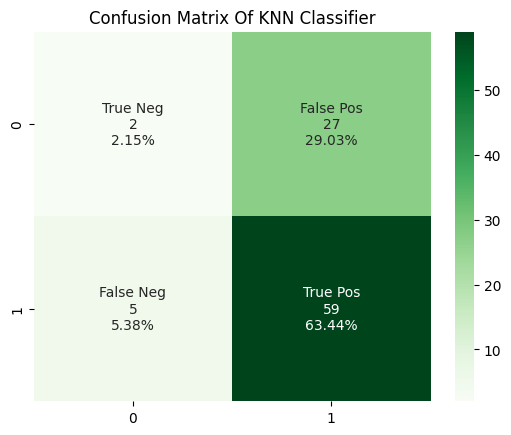

In [16]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_knn.flatten() / np.sum(confusion_matrix_knn)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
 
sns.heatmap(confusion_matrix_knn, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of KNN Classifier")
plt.savefig("../reports/figures/confusion_matrix_KNN.png", dpi=300)

plt.show()


<h2>5- repeat steps 3 and 4 for the normalized data.</h2>

In [17]:
knn_model.fit(X_train_norm,y_train)
score = knn_model.score(X_valid_norm,y_valid)
print(f'Model Score norm: {score}')

Model Score norm: 0.6991869918699187


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [18]:
param_grid_knn = {
    "n_neighbors": list(range(3,16,2)),
    "weights" : ["uniform" , "distance"],
    "metric": ["minkowski" , "euclidean" , "manhattan"],
    "p" : [1,2]
}

In [19]:

grid_search_knn = GridSearchCV(
    knn_model,
    param_grid= param_grid_knn,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1
)

In [20]:
grid_search_knn.fit(X_train_norm,y_train)

valid_score_1 = grid_search_knn.score(X_valid_norm , y_valid)

print("best score of train set norm: " + str(grid_search_knn.best_score_))
print("best parameter set norm: " + str(grid_search_knn.best_params_))
print("validation score norm: " + str(valid_score_1))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/ne

best score of train set norm: 0.7588607594936708
best parameter set norm: {'metric': 'minkowski', 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}
validation score norm: 0.7723577235772358


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/ne

In [21]:
y_pred_knn = grid_search_knn.best_estimator_.predict(X_valid_norm)


In [22]:

precision_knn = precision_score(y_valid, y_pred_knn , pos_label='Y')
recall_knn = recall_score(y_valid , y_pred_knn, pos_label='Y')

#f1_knn
valid_score_2 = f1_score(y_valid , y_pred_knn, pos_label='Y')


print(f'validation_precision_score norm: {precision_knn:.3f}')
print(f'validation_recall score norm: {recall_knn:.3f}')
print(f'validation_F-1 score norm: {valid_score_2:.3f}')

validation_precision_score norm: 0.771
validation_recall score norm: 0.953
validation_F-1 score norm: 0.853


In [23]:
progress = valid_score_2 - valid_score_1

print(f'model progress on validation normalized data: {progress}')

model progress on validation normalized data: 0.08027385537013265


In [24]:
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test_norm)


In [25]:

precision_knn = precision_score(y_test, y_pred_knn , pos_label='Y')
recall_knn = recall_score(y_test , y_pred_knn,pos_label='Y')

#f1_log
f1_knn= f1_score(y_test , y_pred_knn, pos_label='Y')


print(f'test_precision_score norm: {precision_knn:.3f}')
print(f'test_recall score norm: {recall_knn:.3f}')
print(f'test_F-1 score norm: {f1_knn:.3f}')

test_precision_score norm: 0.765
test_recall score norm: 0.969
test_F-1 score norm: 0.855


In [28]:

confusion_matrix_knn = confusion_matrix(y_test , y_pred_knn)

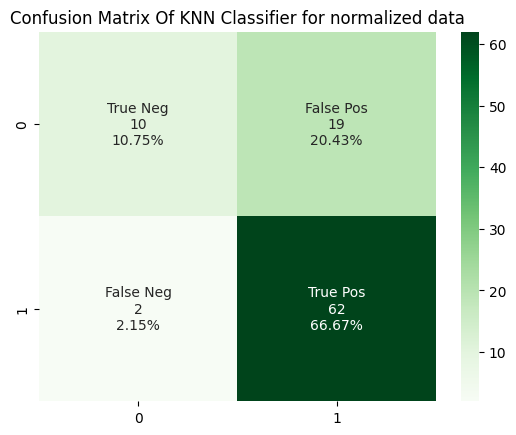

In [30]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_knn.flatten() / np.sum(confusion_matrix_knn)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
 
sns.heatmap(confusion_matrix_knn, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of KNN Classifier for normalized data")
plt.savefig("../reports/figures/confusion_matrix_KNN_normalized_data.png", dpi=300)

plt.show()

########